## Daniel Barella
## 9/21/25

# 📘 Day 22 – Linear Regression Deep Dive (Ames Housing)

## 🧠 Concepts Learned
- Multiple Linear Regression predicts a continuous target from multiple features.
- Key metrics: 
  - **R² Score** – proportion of variance explained
  - **Mean Squared Error (MSE)** – average squared difference between predicted and true values
- Assumptions of Linear Regression:
  1. Linearity
  2. Independence of errors
  3. Homoscedasticity
  4. Normality of residuals
  5. No multicollinearity

## 🛠️ Practice Work




In [1]:
### Load Dataset

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load Ames Housing dataset from OpenML
from sklearn.datasets import fetch_openml
ames = fetch_openml(name="house_prices", as_frame=True)
df = ames.frame
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Preprocess Data

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Select numeric features only
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_features.remove("SalePrice")
X = df[numeric_features]
y = df["SalePrice"]

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create a pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),   # Step 1: Replace NaNs with column mean
    ('scaler', StandardScaler()),                  # Step 2: Standardize features
    ('regressor', LinearRegression())              # Step 3: Fit Linear Regression
])

# Fit the pipeline on training data
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

# Access coefficients and intercept (from the linear regression step)
regressor = pipeline.named_steps['regressor']
coefficients = pd.Series(regressor.coef_, index=numeric_features)
intercept = regressor.intercept_

print("Intercept:", intercept)
print(coefficients.sort_values(ascending=False))


Mean Squared Error: 1359635764.7333722
R² Score: 0.8227408159695493
Intercept: 181441.54195205492
OverallQual      24507.716139
GrLivArea        13295.845778
GarageCars        9139.773390
2ndFlrSF          9101.192865
TotRmsAbvGrd      8298.449234
YearBuilt         8279.220798
1stFlrSF          7625.421617
BsmtFullBath      5868.851578
LotArea           4882.281027
OverallCond       4675.809833
MasVnrArea        4232.748094
BsmtFinSF1        3723.149230
ScreenPorch       3550.669456
YearRemodAdd      3492.032228
GarageYrBlt       3177.691022
Fireplaces        3078.377871
TotalBsmtSF       2954.785480
WoodDeckSF        2791.799037
FullBath          1585.724535
3SsnPorch         1243.896635
EnclosedPorch      576.029945
LowQualFinSF       492.718900
BsmtHalfBath      -274.714671
MiscVal           -361.078994
OpenPorchSF       -387.194770
MoSold            -405.934347
BsmtFinSF2        -614.571963
BsmtUnfSF         -694.162863
YrSold            -697.425093
PoolArea          -772.089335
Ga

🔹 Performance metrics

Mean Squared Error (MSE): 1,359,635,764

That’s the average squared difference between predicted and actual prices.

Since you’re predicting house prices in dollars, the square root (RMSE) is easier to interpret:

1
,
359
,
635
,
764
≈
36
,
865
1,359,635,764
	​

≈36,865

→ On average, your predictions are off by about $36K.

R² Score: 0.8227 (~82%)

About 82% of the variation in house prices is explained by your model’s features.

That’s actually quite solid for housing data.

🔹 Intercept

181,441.54

This is the baseline predicted price when all features = 0.

Not super meaningful here (since houses never have 0 sqft, 0 year, etc.), but it anchors the regression line.

🔹 Coefficients (Feature Importance)

Each number shows how much the SalePrice changes for a +1 unit increase in that feature, holding everything else constant:

✅ Positive coefficients → raise price

OverallQual (24,508): Each step in quality rating adds about $24.5K. Biggest driver of price.

GrLivArea (13,296): Each additional sqft of above-ground living space adds ~$13.3 per sqft (since the units are square feet).

GarageCars (9,140): Each extra car spot in the garage adds ~$9.1K.

YearBuilt (8,279): Newer homes sell for more—each year adds ~$8.3K.

Bathrooms, Fireplaces, Porch/Deck areas all contribute positively.

⚠️ Negative coefficients → lower price

MSSubClass (-8,596): Higher subclass code (usually smaller/older homes) reduces value.

BedroomAbvGr (-6,943): More bedrooms above ground lowers price—probably because bigger bedrooms don’t necessarily mean more valuable (could be eating up living space).

LotFrontage (-2,996): Wider lot frontage is linked with lower prices in this dataset (maybe multicollinearity with LotArea).

KitchenAbvGr (-2,144): Extra kitchens above ground floor = less valuable (maybe unusual layouts).

HalfBath (-1,159): More half baths without full baths lowers price.

Id (-946): Just a row number → meaningless predictor. Should be dropped.

🔹 Takeaways

The model confirms what you’d expect: quality, size, garages, and newness drive value up.

Some features (like Id, MSSubClass, BedroomAbvGr) either act as noise or represent negative correlations.

Before interpreting too literally, you’d want to:

Scale/normalize features (since sqft ≠ same scale as year).

Check multicollinearity (some features overlap, e.g. TotalBsmtSF and 1stFlrSF).

## Visualize Residuals

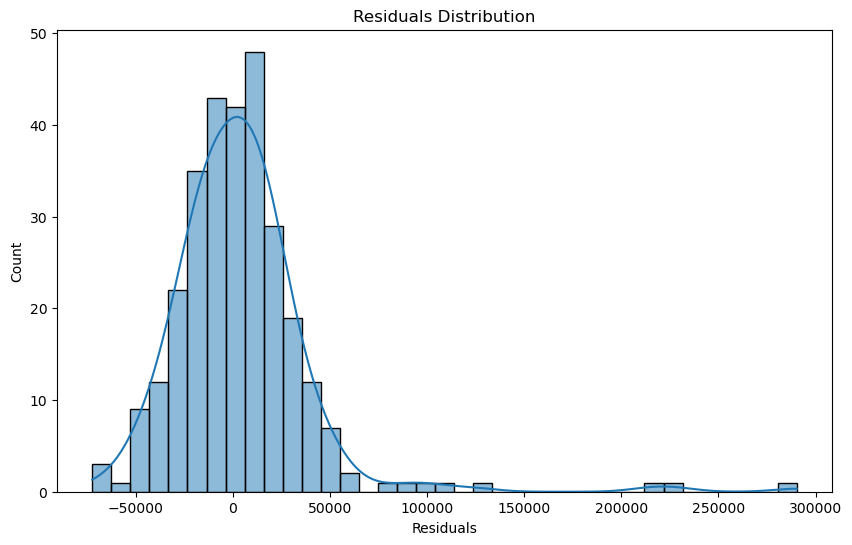

In [3]:
residuals = y_test - y_pred

plt.figure(figsize=(10,6))
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.show()


🔹 What residuals are

Residual = Actual − Predicted

It’s the “error” for each prediction: how far off your model was from the true SalePrice.

🔹 What the histogram shows

On the x-axis: the size of the errors (residual values).

On the y-axis: how often each error size occurs.

The KDE curve (blue line) smooths the histogram into a probability density shape.

🔹 How to interpret it

✅ Good sign: If the distribution is roughly bell-shaped, centered at 0, that means your model is on average unbiased (not consistently over- or under-predicting).

⚠️ Warning signs:

If it’s skewed (shifted left or right) → your model systematically under- or over-predicts.

If there are big tails/outliers → some predictions are way off.

If it’s very wide → your model’s predictions are imprecise (high error).

🔹 Example interpretation

If you see most residuals clustering near 0, your model is fitting the data well.

If the residuals spread far away from 0, it means your model has high variance in prediction accuracy.

## Feature Importance Visualization

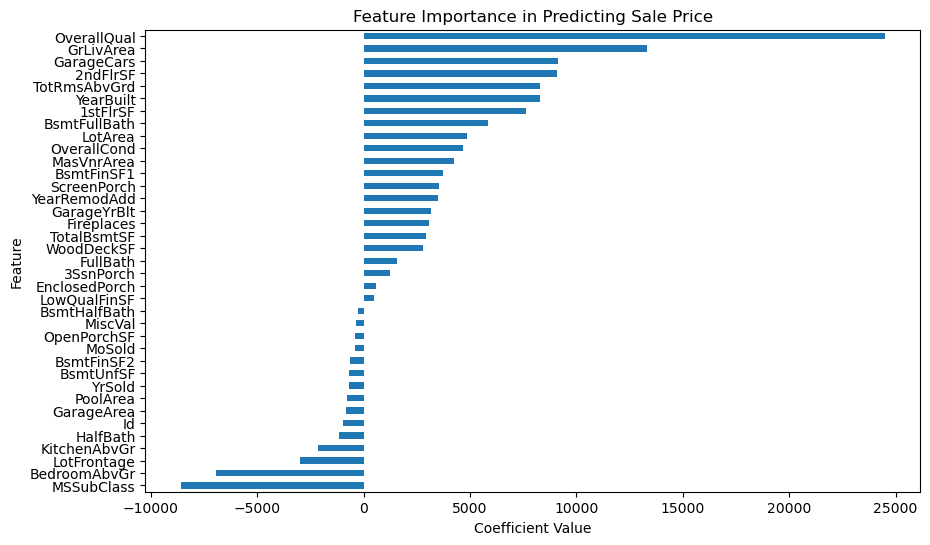

In [4]:
plt.figure(figsize=(10,6))
coefficients.sort_values().plot(kind="barh")
plt.title("Feature Importance in Predicting Sale Price")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()


## 🎯 Mini Project: Predict House Prices (Variation)

- Use a **subset of Ames Housing** (e.g., 10 most relevant numeric features).  
- Train a multiple regression model and evaluate it.  
- Compare the performance to a model using **all numeric features**.  
- Create a plot of **actual vs predicted SalePrice** to visualize fit.  
- Write 2–3 sentences about which features you think most influence housing prices.  


In [6]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 10 strong numeric features
features = [
    "OverallQual",
    "GrLivArea",
    "GarageCars",
    "TotalBsmtSF",
    "1stFlrSF",
    "YearBuilt",
    "FullBath",
    "TotRmsAbvGrd",
    "Fireplaces",
    "LotArea"
]

# Feature matrix and target
X = df[features]
y = df["SalePrice"]

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create pipeline: impute → scale → linear regression
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),   # Replace NaNs with column mean
    ('scaler', StandardScaler()),                  # Standardize features
    ('regressor', LinearRegression())              # Linear regression
])

# Fit pipeline
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

# Coefficients and intercept
regressor = pipeline.named_steps['regressor']
coefficients = pd.Series(regressor.coef_, index=features)
intercept = regressor.intercept_

print("Intercept:", intercept)
print("Coefficients:\n", coefficients.sort_values(ascending=False))

Mean Squared Error: 1554147852.6350365
R² Score: 0.7973817787333746
Intercept: 181441.54195205483
Coefficients:
 OverallQual     28565.878230
GrLivArea       22123.884390
YearBuilt       11562.433697
GarageCars      10456.403550
TotalBsmtSF      6224.013777
LotArea          6061.218740
Fireplaces       4757.593413
1stFlrSF         3626.065142
TotRmsAbvGrd     1174.766649
FullBath        -2373.544671
dtype: float64


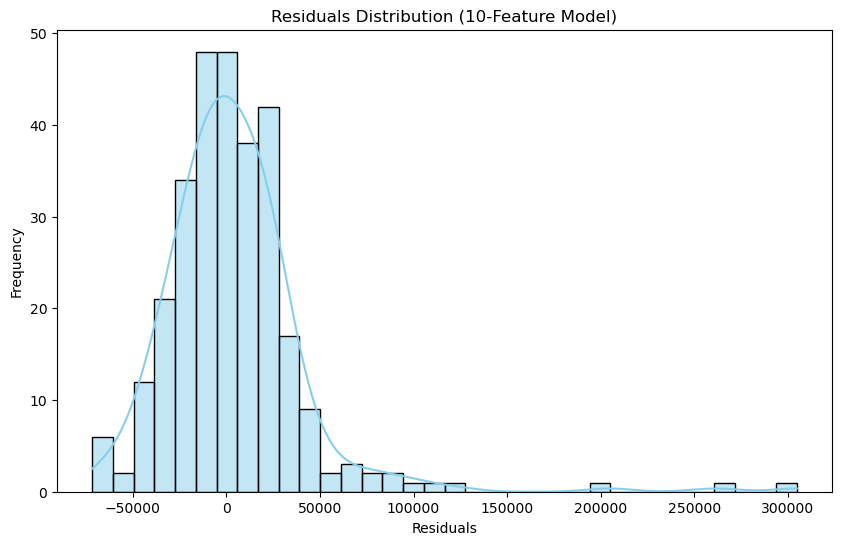

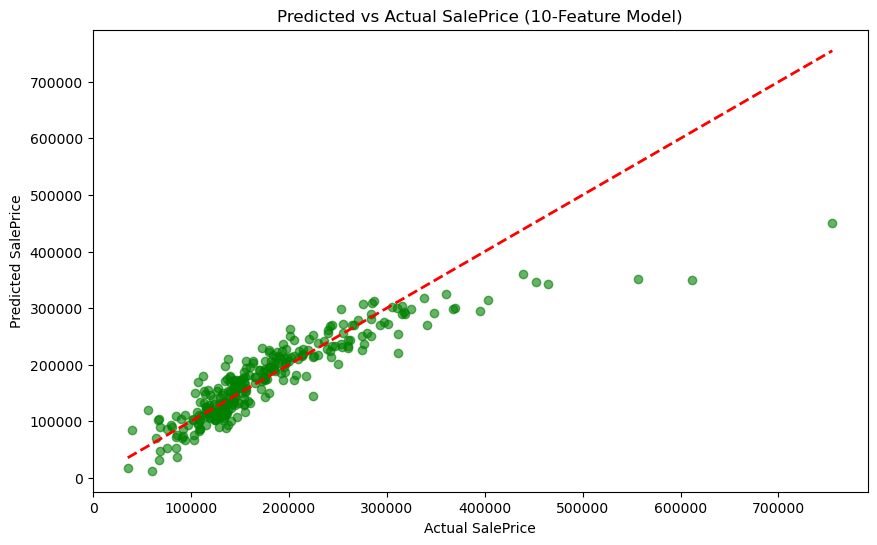

In [7]:
# Residuals
residuals = y_test - y_pred

# 1️⃣ Residuals histogram
plt.figure(figsize=(10,6))
sns.histplot(residuals, kde=True, color='skyblue')
plt.title("Residuals Distribution (10-Feature Model)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# 2️⃣ Predicted vs Actual scatter
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Predicted vs Actual SalePrice (10-Feature Model)")
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.show()


The most influential features in predicting SalePrice were OverallQual, GrLivArea, and GarageCars, as indicated by their large positive coefficients. The reduced 10-feature model performed slightly worse than the full numeric-feature model, with a slightly higher MSE and lower R², but it still captured most of the variance in the data and remains a strong, simpler predictor. Overall, focusing on the strongest features made the model more interpretable without a huge loss in accuracy.